In [1]:
import gym
import highway_env
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN

env = gym.make('ma-highway-v0')


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to pro

In [2]:
from matplotlib import pyplot as pyplot
%matplotlib inline

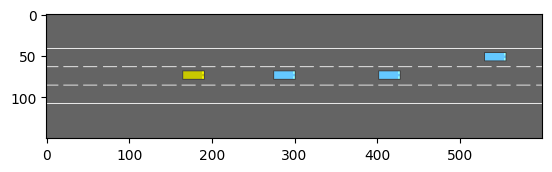

In [24]:
env.configure({"vehicles_count": 17, "vehicles_density": 1.2, "simulation_frequency":15, "duration":40, "road_length":2000,  "controlled_vehicles": 8,})
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

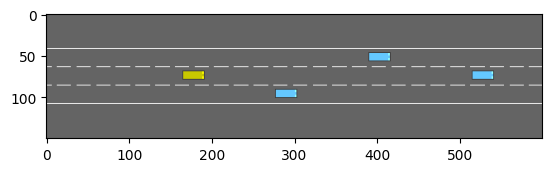

In [5]:
import matplotlib.pyplot as plt 

# Visualization utils
%load_ext tensorboard

env.configure({'initial_lane_id':0, "vehicles_count": 25, "simulation_frequency":12.5, "duration":35})
env.reset()
hey = env.step(2)
print(hey)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
(array([[ 1.        ,  0.2809732 ,  0.31171045,  0.02219997],
       [ 0.13634795,  0.16872594, -0.01355371,  0.03692686],
       [ 0.2758941 , -0.2809732 ,  0.01794953, -0.02219997],
       [ 0.38581684,  0.09645104, -0.04896054, -0.03275437],
       [ 0.5377616 ,  0.2494903 , -0.04005906,  0.02413468]],
      dtype=float32), 0.8554735301213369, False, {'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'proactive_mlc_reward': [0.22731564878397026, 1], 'collision_penalty': [0, 10], 'lane change penalty': [-1, 1], 'high_speed_reward': [0.6624557897457161, 0.55]}})


In [6]:
%tensorboard --logdir "..\highway_dqn"

Reusing TensorBoard on port 6006 (pid 10812), started 0:00:06 ago. (Use '!kill 10812' to kill it.)

In [6]:
TRAIN = True

# Create the model
model = DQN('MlpPolicy', env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=5e-4,
            buffer_size=15000,
            learning_starts=200,
            batch_size=32,
            gamma=0.8,
            train_freq=1,
            gradient_steps=1,
            target_update_interval=50,
            verbose=1,
            tensorboard_log="highway_dqn/",
            exploration_fraction=0.01,
            exploration_initial_eps=1.0, 
            exploration_final_eps=0.05)

# Train the model
if TRAIN:
    model.learn(total_timesteps=int(5000))
    model.save("highway_dqn/model")
    #del model

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_11
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35       |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4        |
|    time_elapsed     | 33       |
|    total_timesteps  | 140      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 51       |
|    total_timesteps  | 209      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 4.04     |
|    n_updates        | 8        |


KeyboardInterrupt: 

In [8]:
for trials in range(10):
        done = False
        obs = env.reset()
        while not done:
            # Predict
            random_action = env.action_space.sample()
            # Get reward
            obs, reward, done, info = env.step(random_action)
            # Render
            env.render()
            print(obs[0])
env.close()

[230.37221   0.       20.85444   0.     ]
[250.48398     3.3765285  20.075964    1.6785573]
[270.10883     7.316666   19.938293    1.8609577]
[2.9010834e+02 7.9290805e+00 2.0003218e+01 2.0464687e-01]
[3.1011029e+02 7.9928522e+00 2.0000717e+01 2.0744914e-02]
[3.3011066e+02 7.9992819e+00 2.0000124e+01 2.0856455e-03]
[3.5011072e+02 7.9999280e+00 2.0000021e+01 2.0949697e-04]
[3.7011075e+02 7.9999928e+00 2.0000004e+01 2.1041231e-05]
[3.9011075e+02 7.9999990e+00 2.0000000e+01 2.1132921e-06]
[4.1011075e+02 8.0000000e+00 2.0000000e+01 2.1224980e-07]
[4.3011075e+02 8.0000000e+00 2.0000000e+01 2.1317438e-08]
[4.5011075e+02 8.0000000e+00 2.0000000e+01 2.1410305e-09]
[4.7011075e+02 8.0000000e+00 2.0000000e+01 2.1503624e-10]
[4.9011075e+02 8.0000000e+00 2.0000000e+01 2.1596900e-11]
[5.1011075e+02 8.0000000e+00 2.0000000e+01 2.1694777e-12]
[5.3011072e+02 8.0000000e+00 2.0000000e+01 2.1844573e-13]
[5.501107e+02 8.000000e+00 2.000000e+01 2.304648e-14]
[5.7011072e+02 8.0000000e+00 2.0000000e+01 5.28291

KeyboardInterrupt: 

In [2]:
from pprint import pprint as pp

pp(env.observation_space.sample())

array([[ 0.157241  ,  0.53133726,  0.30462623,  0.6235946 ],
       [ 2.088964  , -0.39865485,  0.85608757, -0.38597256],
       [ 0.08882125, -1.1923083 , -0.2405251 , -1.2676148 ],
       [-0.9380689 , -0.43433088,  0.77604675,  0.67337257],
       [-1.2851994 ,  0.36483926,  1.2371978 , -0.0301004 ]],
      dtype=float32)


In [2]:
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))


The observation space: Box(-inf, inf, (5, 4), float32)
The action space: Discrete(5)


In [20]:
from pprint import pprint


for i in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, info = env.step(action)
    pprint([obs, reward, terminated, info])


[array([[1.000000e+00, 1.000000e+00, 6.666667e-01, 4.062500e-01,
        8.881784e-16],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00]], dtype=float32),
 4.0,
 True,
 {'TimeLimit.truncated': True,
  'action': 1,
  'crashed': False,
  'rewards': {'on_road_reward': 1.0,
              '~collision_penalty': 1,
              '~lane change penalty': 0,
              '~sudden aceleration penalty': 0,
              '~target lane reward': 1,
              '~target speed reward': 1},
  'speed': 32.50000000000064}]
[array([[1.000000e+00, 1.000000e+00, 6.666667e-01, 4.062500e-01,
        8.881784e-16],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [0.00000

In [1]:
TRAIN = True

# Create the model
model = DQN('MlpPolicy', env,
            policy_kwargs=dict(net_arch=[256, 256]),
            learning_rate=5e-4,
            buffer_size=15000,
            learning_starts=200,
            batch_size=32,
            gamma=0.8,
            train_freq=1,
            gradient_steps=1,
            target_update_interval=50,
            verbose=1,
            tensorboard_log="highway_dqn/")

# Train the model
if TRAIN:
    model.learn(total_timesteps=int(2e4))
    model.save("highway_dqn/model")
    #del model

c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\ProgramData\Anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to proper